In [1]:
"""

Purpose: To explore the algorithm that will error out the presyns on non-axon faces

"""

'\n\nPurpose: To explore the algorithm that will error out the presyns on non-axon faces\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

In [5]:
import neuron_utils as nru
import neuron_visualizations as nviz

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-13 20:19:41,976 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-13 20:19:41,978 - settings - Setting database.user to celiib
INFO - 2021-02-13 20:19:41,979 - settings - Setting database.password to newceliipass
INFO - 2021-02-13 20:19:41,991 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-13 20:19:41,993 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-13 20:19:42,006 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-13 20:19:42,320 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-13 20:19:42,353 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-13 20:19:42,684 - settings - Setting enable_python_native_blobs to True


# Exploring Excitatory Cells without Axons

In [15]:
axonless_segs,split_indexes = (minnie.AutoProofreadNeurons() & "cell_type_predicted = 'excitatory'" & "n_axons = 0").fetch("segment_id","split_index")
axonless_segs

array([864691134737851386, 864691134832191490, 864691134875433210, ...,
       864691137196924481, 864691137196927297, 864691137196929345])

In [63]:
import numpy as np
np.where(axonless_segs == 864691135103978317)

(array([410]),)

In [91]:
curr_index = 500
segment_id = axonless_segs[curr_index]
split_index = split_indexes[curr_index]
search_dict = dict(segment_id=segment_id,split_index=split_index)
minnie.AutoProofreadNeurons() & search_dict

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135117845469,0,0.25,30.00,5,0,0,1,2,excitatory,densely_spined,0,0,408180,637.97,1,1,241997,246638,22887,24129,651,=BLOB=,289197,575993,0,0,0,0,1,6,71,46

In [92]:
minnie.ProofreadStats() & search_dict

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error
864691135117845469,0,0.25,30.00,5,0,0,1,4026.38,4613.27,0.0,0.0,0.0,0.0,161.87,61.88,0.0,0.0,0.0,0.0,8,153,406,41,447,601,194,795,0.6755,0.2113,0.5623


In [93]:
du.plot_proofread_neuron(segment_id,
                         split_index=split_index,
                        plot_nuclei=True,
                         plot_errored_faces=True,
                         plot_synapses=True,
                         plot_paired_nuceli=False,
                         
                         
                         synapse_scatter_size= 0.5,
                         valid_presyn_color="yellow",
                          valid_postsyn_color="aqua",
                          error_presyn_color="black",
                          error_postsyn_color="orange",
                        )
print(f"Segment_id={segment_id}")

Synapsse Results:
Total Number of Synapses = 795
n_valid_syn_centers_presyn = 8
n_errored_syn_centers_presyn = 593
n_valid_syn_centers_postsyn = 153
n_errored_syn_centers_postsyn = 41


Segment_id=864691135117845469


In [94]:
neuron_obj = du.decomposition_with_spine_recalculation(**search_dict)

Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [95]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [86]:
import proofreading_utils as pru
import classification_utils as clu

In [96]:
clu.axon_classification(neuron_obj,
                        plot_candidates=True,
                       plot_axon_errors=True,
                        plot_axons=True,)


Part 1: Axon like branchese 
{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 22, 24, 25, 29, 30, 41, 43, 48, 49, 50, 51, 55, 61, 62,
       63, 75, 76, 77, 78, 83, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]), 'L2': array([ 0,  4,  5,  6,  7,  9, 10])}
Limb L0 soma angle: 25.93 
Limb L1 soma angle: 96.97 
Limb L2 soma angle: 70.66 
Limb L3 soma angle: 134.53 
Limb L4 soma angle: 119.27 
Limb L5 soma angle: 123.9 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5]

Phase 2: Working on Limb L1
nodes_to_eliminate = [29]

Phase 2: Working on Limb L2
nodes_to_eliminate = []

Phase 2: Working on Limb L3
nodes_to_eliminate = []

Phase 2: Working on Limb L4
node

Final Candidates

Limb 1
Candidate 0 (tan): array([30])
Candidate 1 (crimson): array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

Limb 2
Candidate 0 (darkslategray): array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Limb 3
Candidate 0 (brown): array([0, 1])

Limb 4
Candidate 0 (darkslategray): array([0, 1, 2])

Limb 5
Candidate 0 (palegreen): array([0])
Candidate 1 (magenta): array([2])
Part 3: axon_subgraph_candidates = {1: [[30], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]], 2: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14

({},
 {'L0': array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 22, 24, 25, 29, 41, 43, 49, 50, 51, 55, 61, 62, 63, 75, 76,
         77, 78, 83, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
  'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
         18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 32, 33, 34, 35, 36, 38, 39,
         40, 42, 44, 45, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61,
         62, 63, 64, 65]),
  'L2': array([ 0,  4,  5,  6,  7,  9, 10])})

In [116]:
output_dict= pru.proofread_neuron(neuron_obj,
                                plot_limb_branch_filter_with_disconnect_effect=False,
                                plot_final_filtered_neuron=False,
                                verbose=True)

---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Axon Classification = 29.716429233551025


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = densely_spined
Did not pass final filters to continuing
Did not pass final filters to continuing
Inhibitory Excitatory Classification = 13.568475008010864

 -- Cell Type Classification Results --
inh_exc_class=excitatory
spine_category=densely_spined
axon_angles={}
n_axons=0
n_apicals=0
neuron_spine_density=0.0003382264642349772
n_branches_processed=24
skeletal_length_processed=1543742.380311538
n_branches_in_search_radius=68
skeletal_length_in_search_radius=3072527.388105785


 ------ Part D: Neuron Filtering ---- 

 

--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}


----------------------- Running Filter --------

total_sk_distance = 4613.268826728596, total_area = 4026.3809591336876
----------------------- FINISHED Running Filter ------------------



 --Filter axon_on_dendrite_merges Results --
local_results = {'axon_on_dendrite_merges_neuron': <neuron.Neuron object at 0x7f9accb72f28>, 'axon_on_dendrite_merges_time': 21.43868398666382, 'axon_on_dendrite_merges_error_area': 4026.3809591336876, 'axon_on_dendrite_merges_error_length': 4613.268826728596}

--- Working on filter 1:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}


----------------------- Running Filter ------------------
limb_branch_restriction = {'L0': array([19, 20, 36, 39, 43, 47]), 'L1': array([3, 6]), 'L2': array([4]), 'L5': array([1])}
--- Working on Limb L0 ---
nodes_to_keep = [19 20 36 39 43 47]
--- Working on Limb L1 ---
nodes_to_keep = [3 6]
--- Working on Limb L2 ---
nodes_to_keep = [4]
--- Working on Limb L5 ---
nodes_to_keep = [1]
limb_branch_dict was emp

total_sk_distance = 852.2535574185507, total_area = 1970.5537436386005
----------------------- FINISHED Running Filter ------------------



 --Filter double_back_and_width_change Results --
local_results = {'double_back_and_width_change_neuron': <neuron.Neuron object at 0x7f9a24272f28>, 'double_back_and_width_change_time': 20.385689973831177, 'double_back_and_width_change_error_area': 1970.5537436386005, 'double_back_and_width_change_error_length': 852.2535574185507}

--- Working on filter 4:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 30}


----------------------- Running Filter ------------------
crossover_coordinates = []

--- Working on Limb L0 ---
edges_to_create = []
edges_to_create = []
crossover_coordinates = [[1024500.  989826.  872020.]]
branch 2 did not have one of the following in their labels : ['axon', 'axon-like']

--- Working on Limb L1 ---
edges_to_create = []
edges_to_create = []
cr

In [ ]:
print(f"edges_to_create_and_delete_by_doubling_back_and_width")
print(f"running_width_jump_method = {kwargs['running_width_jump_method']}")

In [99]:
nviz.visualize_neuron_lite(output_dict["filtered_neuron"])


 Working on visualization type: mesh



 Working on visualization type: mesh


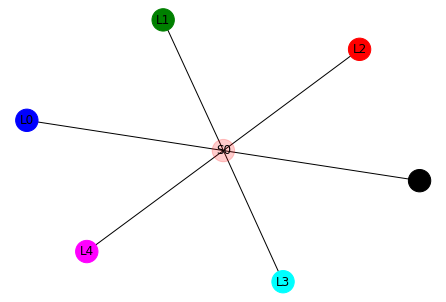

In [102]:
nviz.visualize_neuron_limbs(output_dict["filtered_neuron"])